In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("/Users/lilitharutyunyan/Documents/GitHub/Compas-recidivism-analysis/data-cleaned/compas-scores-two-years-clean.csv", parse_dates=["c_jail_in", "c_jail_out"])
df

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,score_text,v_type_of_assessment,v_decile_score,v_score_text,in_custody,out_custody,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Low,Risk of Violence,1,Low,2014-07-07,2014-07-14,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,Low,Risk of Violence,1,Low,2013-01-26,2013-02-05,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,Low,Risk of Violence,3,Low,2013-06-16,2013-06-16,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,High,Risk of Violence,6,Medium,NaN,NaN,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,Low,Risk of Violence,1,Low,NaN,NaN,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6211,10995,raheem smith,raheem,smith,2013-10-20,Male,1995-06-28,20,Less than 25,African-American,...,High,Risk of Violence,9,High,2014-04-07,2014-04-27,0,169,0,0
6212,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,Medium,Risk of Violence,5,Medium,2013-11-22,2013-11-24,1,860,0,0
6213,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,Low,Risk of Violence,5,Medium,2014-01-31,2014-02-02,1,790,0,0
6214,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,Low,Risk of Violence,1,Low,2014-01-13,2014-01-14,0,808,0,0


In [26]:
df.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,v_decile_score,start,end,event,two_year_recid
count,6216.000000,6216.000000,6216.000000,6216.000000,6216.000000,6216.000000,6216.000000,5926.000000,6200.000000,6216.000000,1651.000000,0.0,6216.000000,6216.000000,6216.000000,6216.000000,6216.000000,6216.000000
mean,5470.344112,35.269788,0.058719,1.200706,0.087033,0.100708,3.227477,4.389470,61.726613,0.397844,22.437916,NaN,0.096203,3.584942,11.891248,611.928732,0.314994,0.362452
std,3168.026235,11.983151,0.401840,0.783083,0.493549,0.487817,4.606728,78.517503,348.547440,0.489492,82.688464,NaN,0.294894,2.488175,49.539684,394.904906,0.464551,0.480747
min,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-356.000000,0.000000,0.000000,-1.000000,NaN,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2690.750000,26.000000,0.000000,0.693147,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,1.000000,0.000000,198.000000,0.000000,0.000000
50%,5459.500000,32.000000,0.000000,1.386294,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,3.000000,0.000000,749.000000,0.000000,0.000000
75%,8203.250000,43.000000,0.000000,1.945910,0.000000,0.000000,4.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,5.000000,1.000000,947.000000,1.000000,1.000000
max,11000.000000,96.000000,10.000000,2.302585,13.000000,17.000000,37.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,937.000000,1186.000000,1.000000,1.000000


* first: An individual’s first name

* last: An individual’s last name

* sex: An individual’s sex

* age: An individual’s age

* race: An individual’s race. It takes values of Caucasian, Hispanic, African-American, Native American, Asian, or Other

* priors_count: Number of previous arrests

* decile_score: The COMPAS risk score

* two_year_recid: Whether the individual had been jailed for a new crime in next two years

* I would assume that the prefixes c_, r_ and vr_* stand for "charge", "recidivism" and "violent recidivism"

* charge_degree: We assume that the value "F" stands for Felony (serious crime) and M for misdemeanor. Is this correct? reasonable

* juv_fel_count: Is this the number of juvenile felonies of the defendant? reasonable

* juv_misd_count: Is this the number of juvenile misdemeanors of the defendant ? reasonable

* juv_other_count: What does "other" include? Should we consider it as an attribute for our model? Another factor level ?

* priors_count: Is this the number of prior felonies or misdemeanors or both and does it also include the juvenile

* priors? Can you compare counts and see if they add up?

In [92]:
df['race'].value_counts()

0    3139
2    2132
3     563
5     340
1      28
4      14
Name: race, dtype: int64

(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

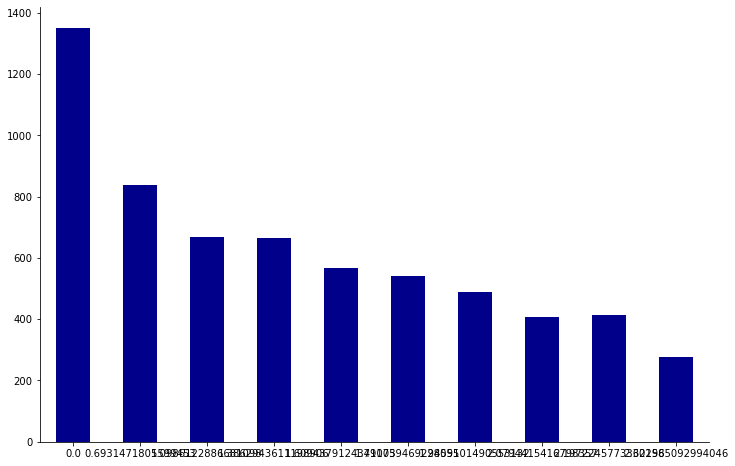

In [95]:
def create_groupcount_barplot(df, group_col, figsize, **kwargs):
    "call df.groupby(group_col), then count number of records and plot"
    counts = df.groupby(group_col)["name"].count().sort_index()

    fig, ax = plt.subplots(figsize=figsize)
    counts.plot(kind="bar", **kwargs)

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xlabel("")
    ax.set_ylabel("")

    return fig, ax

create_groupcount_barplot(df, "decile_score", (12, 8), color="DarkBlue", rot=0)

# First Model with Age Category

In [3]:
features = pd.concat([pd.get_dummies(df.age_cat,prefix='age',drop_first=True),
                    pd.get_dummies(df.sex, prefix='sex',drop_first=True),
                    pd.get_dummies(df.race, prefix='race',drop_first=True),  
                    pd.get_dummies(df.c_charge_degree, prefix='degree',drop_first=True), # felony or misdemeanor charge ('f' or 'm')
                    df.priors_count,
                    df.juv_fel_count,
                    df.juv_misd_count,
                    df.juv_other_count,
                    df.two_year_recid],
                    axis=1)

target = df.decile_score

In [4]:
x = features.values
y=target.values
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [5]:
linearreg = LinearRegression()
linearreg.fit(X_train,y_train)
y_pred = linearreg.predict(X_test)

In [6]:
r2_score(y_test, y_pred)

0.4408014759032969

In [7]:
mean_squared_error(y_test, y_pred)

4.418449546879099

# Second Model with Age

In [8]:
features_1 = pd.concat([df.age,
                    pd.get_dummies(df.sex, prefix='sex',drop_first=True),
                    pd.get_dummies(df.race, prefix='race',drop_first=True),  
                    pd.get_dummies(df.c_charge_degree, prefix='degree',drop_first=True), # felony or misdemeanor charge ('f' or 'm')
                    df.priors_count,
                    df.juv_fel_count,
                    df.juv_misd_count,
                    df.juv_other_count,
                    df.two_year_recid],
                    axis=1)

target_1 = df.decile_score

In [9]:
x_1 = features_1.values
y_1=target_1.values
X_train, X_test, y_train, y_test = train_test_split(x_1,y_1, test_size=0.33, random_state=42)

In [10]:
linearreg = LinearRegression()
linearreg.fit(X_train,y_train)
y_pred = linearreg.predict(X_test)

In [11]:
r2_score(y_test, y_pred)

0.4555702639267638

In [12]:
mean_squared_error(y_test, y_pred)

4.301755489333704

# We can see a slight increase, will continue with age variable in the model.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='decile_score', ylabel='Density'>

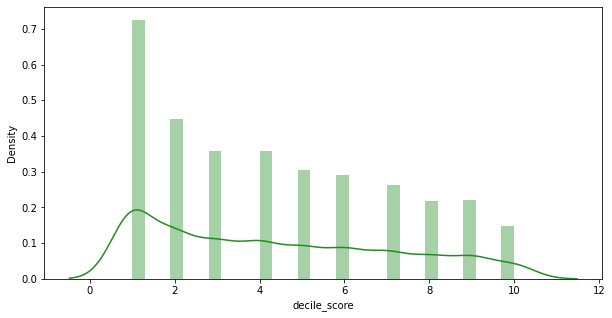

In [13]:
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(df.decile_score, bins=30, kde=True, ax=ax, color='forestgreen')

* From the graph above, we can see that our y variable is not normally distributed, and has long right tail; i.e it is right skewed. Hence, we will take the log of it.

In [14]:
df['decile_score'] = np.log(df.decile_score)
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,score_text,v_type_of_assessment,v_decile_score,v_score_text,in_custody,out_custody,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Low,Risk of Violence,1,Low,2014-07-07,2014-07-14,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,Low,Risk of Violence,1,Low,2013-01-26,2013-02-05,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,Low,Risk of Violence,3,Low,2013-06-16,2013-06-16,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,High,Risk of Violence,6,Medium,NaN,NaN,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,Low,Risk of Violence,1,Low,NaN,NaN,0,1102,0,0


In [15]:
linearreg = LinearRegression()
linearreg.fit(X_train,y_train)
y_pred = linearreg.predict(X_test)

In [17]:
r2_score(y_test, y_pred)
mean_squared_error(y_test, y_pred)

4.301755489333704

* no difference

# We need better feauture selection

In [18]:
df[["decile_score", "two_year_recid"]].corr()

,decile_score,two_year_recid
decile_score,1.000000,0.329759
two_year_recid,0.329759,1.000000


In [19]:
df[["decile_score", "age"]].corr()

,decile_score,age
decile_score,1.000000,-0.467809
age,-0.467809,1.000000


In [20]:
df[["decile_score", "priors_count"]].corr()

,decile_score,priors_count
decile_score,1.000000,0.398967
priors_count,0.398967,1.000000


In [21]:
df[["decile_score", "juv_fel_count"]].corr()

,decile_score,juv_fel_count
decile_score,1.000000,0.153058
juv_fel_count,0.153058,1.000000


In [22]:
df[["decile_score", "juv_misd_count"]].corr()

,decile_score,juv_misd_count
decile_score,1.000000,0.179565
juv_misd_count,0.179565,1.000000


In [23]:
df[["decile_score", "juv_other_count"]].corr()

,decile_score,juv_other_count
decile_score,1.000000,0.163545
juv_other_count,0.163545,1.000000


In [53]:
df['compas_screening_date'] =df['compas_screening_date'].astype('category').cat.codes
df[["decile_score", "compas_screening_date"]].corr()

,decile_score,compas_screening_date
decile_score,1.000000,-0.095114
compas_screening_date,-0.095114,1.000000


In [50]:
df['race'] =df['race'].astype('category').cat.codes
df['age_cat'] =df['age_cat'].astype('category').cat.codes

In [56]:
df['days_in_jail']=df['c_jail_out']-df['c_jail_in']
df['days_in_jail'] =df['days_in_jail'].astype('category').cat.codes
df[["decile_score", "days_in_jail"]].corr()

,decile_score,days_in_jail
decile_score,1.000000,0.229536
days_in_jail,0.229536,1.000000


In [57]:
df['c_charge_degree'] =df['c_charge_degree'].astype('category').cat.codes
df[["decile_score", "c_charge_degree"]].corr()

,decile_score,c_charge_degree
decile_score,1.000000,-0.180373
c_charge_degree,-0.180373,1.000000


In [51]:
df[df.columns[1:]].corr()['decile_score'][:]

age                       -0.467809
age_cat                    0.109841
race                      -0.305689
juv_fel_count              0.153058
decile_score               1.000000
juv_misd_count             0.179565
juv_other_count            0.163545
priors_count               0.398967
days_b_screening_arrest    0.058174
c_days_from_compas         0.029370
is_recid                   0.336577
r_days_from_arrest        -0.028639
violent_recid                   NaN
is_violent_recid           0.158494
v_decile_score             0.754353
start                      0.157745
end                       -0.332290
event                      0.250809
two_year_recid             0.329759
Name: decile_score, dtype: float64

In [43]:
#Independent Variables vs. Dependent Variable
#plt.figure(figsize=(16,20))

#x_cols = features.columns
#for i in range(len(x_cols)):
    #plt.subplot(5,3,i+1).set_facecolor('white')
    #x = features[x_cols[i]]
    #sns.regplot(x=x, y=df.decile_score, n_boot=100,
                #scatter_kws={'color':'green','alpha':0.8}, 
                #line_kws={'color':'red'})
    #plt.xlabel(x_cols[i])
    #plt.ylabel(y)
    #plt.legend([f'rho: {np.round(np.corrcoef(x,y)[0][1],2)}']);

In [38]:
# standardize independent variables
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
X_scaled = minmax_scaler.fit_transform(features)

In [44]:
# standardized dataframe + dependent variable

In [47]:
df_scaled = pd.DataFrame(X_scaled, columns=features.columns)
df_scaled['decile_score'] = y

In [59]:
df_scaled.head()

,age_Greater than 45,age_Less than 25,sex_Male,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,degree_M,priors_count,juv_fel_count,juv_misd_count,juv_other_count,two_year_recid,decile_score
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,3
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108108,0.0,0.000000,0.058824,1.0,4
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027027,0.0,0.076923,0.000000,0.0,8
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.054054,0.0,0.000000,0.000000,0.0,1


In [64]:
features_new = df[["two_year_recid" ,
                          "event", 
                          "end" ,
                          "v_decile_score" , 
                          "is_recid", 
                          "priors_count",  
                          "age", 
                          "race", 
                          "days_in_jail", 
                          "c_charge_degree"]]

target_new = df[["decile_score"]]



In [65]:
x_new = features_new.values
y_new=target_new.values
X_train, X_test, y_train, y_test = train_test_split(x_new,y_new, test_size=0.33, random_state=42)

In [66]:
linearreg = LinearRegression()
linearreg.fit(X_train,y_train)
y_pred = linearreg.predict(X_test)

In [67]:
r2_score(y_test, y_pred)

0.6541995907803387

In [68]:
mean_squared_error(y_test, y_pred)

0.2171131871441148

In [80]:
# standardized dataframe + dependent variable on the new model

In [70]:
minmax_scaler = MinMaxScaler()
X_scaled = minmax_scaler.fit_transform(features_new)

In [81]:
df_scaled = pd.DataFrame(X_scaled, columns=features_new.columns)
df_scaled['decile_score'] = target
df_scaled.head()

,two_year_recid,event,end,v_decile_score,is_recid,priors_count,age,race,days_in_jail,c_charge_degree,decile_score
0,0.0,0.0,0.275105,0.000000,0.0,0.000000,0.649351,1.0,0.329693,0.0,1
1,1.0,1.0,0.133333,0.000000,1.0,0.000000,0.194805,0.0,0.755290,0.0,3
2,1.0,0.0,0.052321,0.222222,1.0,0.108108,0.064935,0.0,0.409727,0.0,4
3,0.0,0.0,0.989873,0.555556,0.0,0.027027,0.051948,0.0,0.000000,0.0,8
4,0.0,0.0,0.929114,0.000000,0.0,0.054054,0.311688,1.0,0.000000,0.0,1


In [83]:
x_new = features_new.values
y_new=target.values
X_train, X_test, y_train, y_test = train_test_split(x_new,y_new, test_size=0.33, random_state=42)

In [84]:
linearreg = LinearRegression()
linearreg.fit(X_train,y_train)
y_pred = linearreg.predict(X_test)

In [85]:
r2_score(y_test, y_pred)

0.7039109421651386

In [77]:
#mean_squared_error(y_test, y_pred) - Question?????

# Final Model

In [ ]:
poly = PolynomialFeatures(interaction_only=True)
X = pd.DataFrame(poly.fit_transform(boston[["lstat", "rm"]]), 
                     columns = ["intercept","lstat", "rm", "lstat_rm"])

X[["chas", "crim"]] = boston[["chas", "crim"]]
X.head()

In [ ]:
regr = LinearRegression().fit(X, y)
pd.DataFrame(regr.coef_, index=X.columns, columns=['Coefficients'])